#### **1. PROBLEM STATEMENT**

BrightPath Academy is currently facing several challenges related to the early identification of at-risk students. The goal is to proactively support learners by analyzing various factors such as academic performance, parental involvement, study habits, and demographic attributes. To achieve this, the Academy aims to develop a machine learning model that classifies students into GradeClass categories, enabling timely and targeted academic interventions.
<br>
<br>


#### **2. HYPOTHESIS** 

- **Hypothesis 1:** *Students with higher StudyTimeWeekly are more likely to achieve higher GradeClass*
<br>
<br>
- **Hypothesis 2:** *There is a positive correalation between ParentalSupport and Academic Performance*
<br>
<br>
- **Hypothesis 3:** *Students that are absent more frequently will have a lower GPA*
<br>
<br>


#### **3. GETTING THE SYSTEM READY**



In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#### **4.1 LOADING AND THE DATA**

In [7]:
df = pd.read_csv("Student_performance_data.csv")
df.head(10)


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


 #### **4.2 UNDERSTANDING THE DATA**

In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


#### **4.2.1 CHECKING FOR ANY MISSING VALUES**

In [9]:
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

#### **4.2.2 VISUALIZING THE DATA**

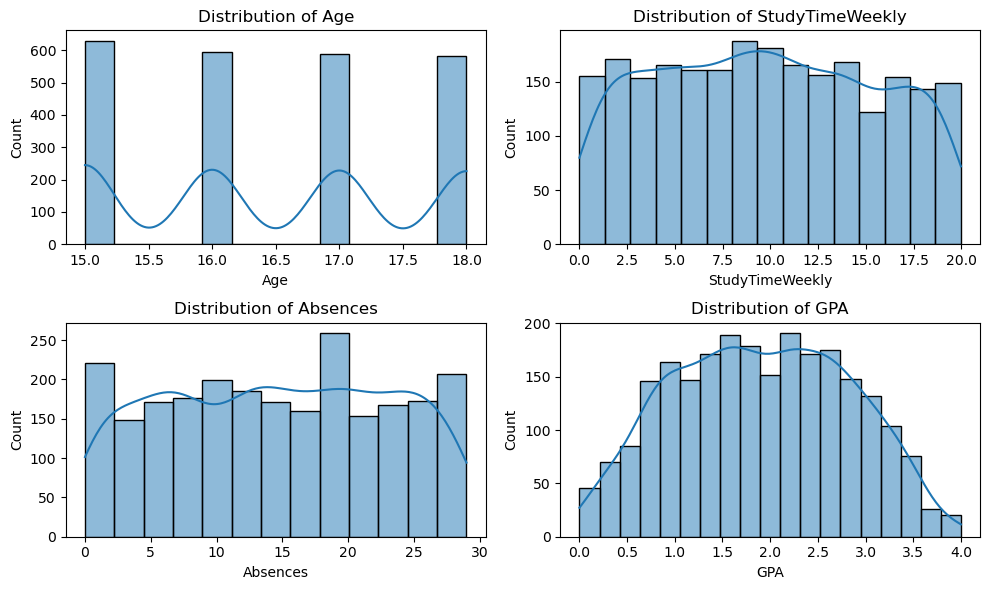

In [10]:
numerical_cols = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

plt.figure(figsize=(10,6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2,2,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

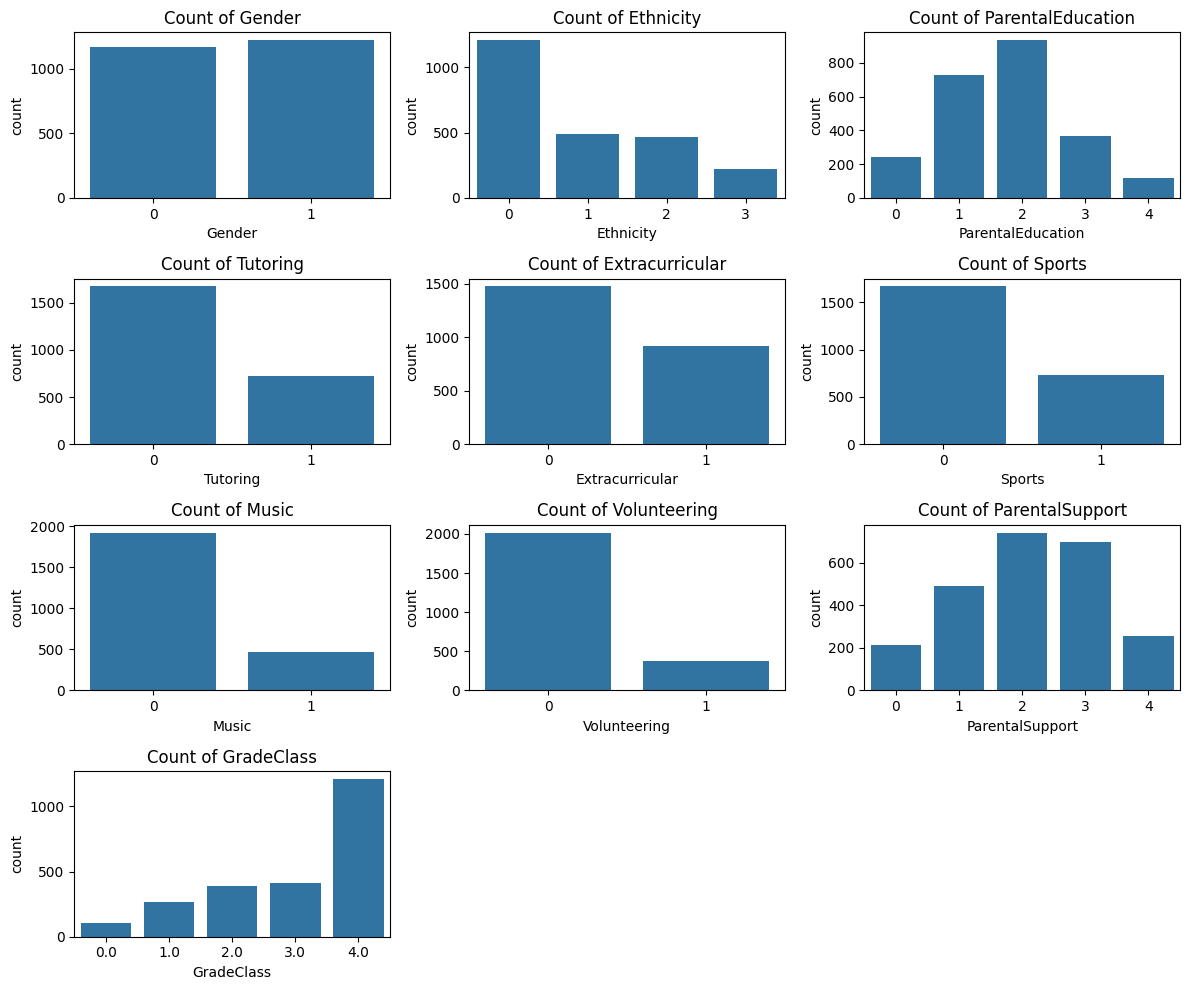

In [7]:
categorical_cols = ['Gender','Ethnicity','ParentalEducation','Tutoring','Extracurricular',
                    'Sports','Music','Volunteering','ParentalSupport','GradeClass']

plt.figure(figsize=(12,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(4,3,i+1)
    sns.countplot(x=df[col])
    plt.title(f"Count of {col}")
plt.tight_layout()
plt.show()

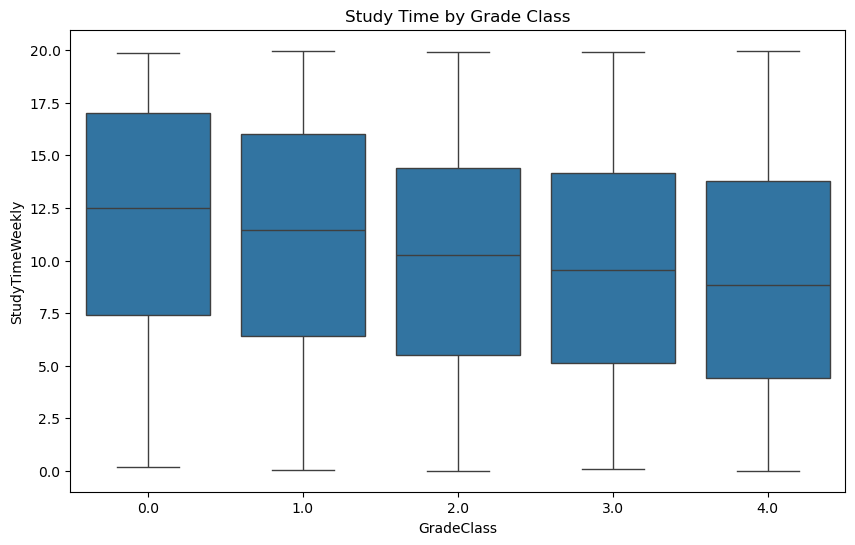

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='GradeClass', y='StudyTimeWeekly', data=df)
plt.title("Study Time by Grade Class")
plt.show()

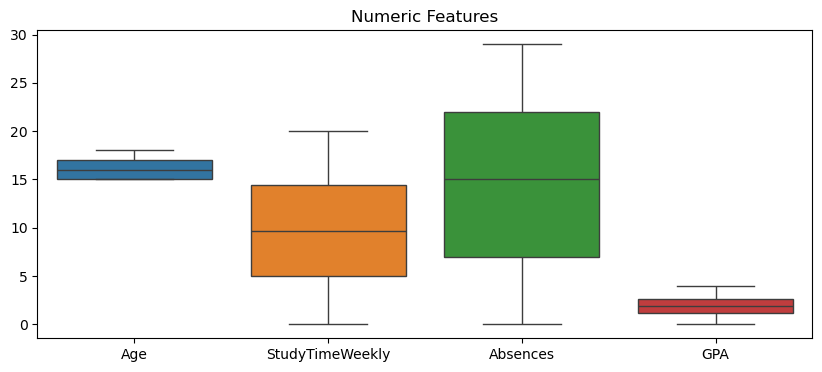

In [12]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df[numerical_cols])
plt.title("Numeric Features")
plt.show()

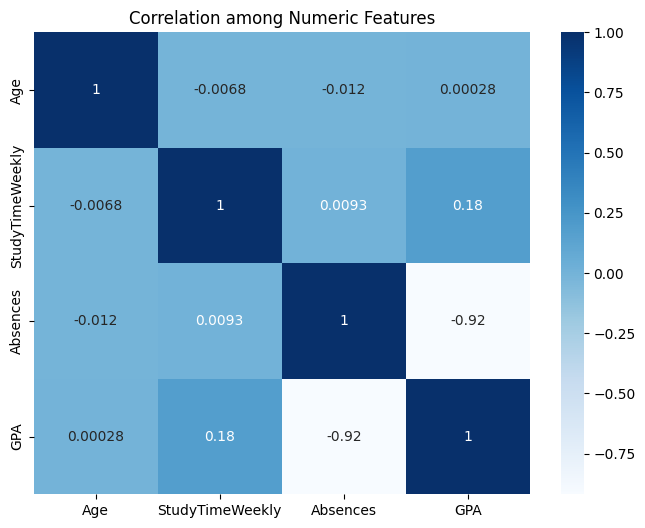

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="Blues")
plt.title("Correlation among Numeric Features")
plt.show()

#### **5. EXPLORATORY DATA ANALYSIS**

##### **5.1 UNIVARIATE ANALYSIS**

In [13]:
 #sort Data into catagorical and numerical 
id_col = ['StudentID']
categorical_cols = []
numerical_cols =[]

for col in df.columns:
    if col in id_col:
        continue 
    elif df[col].dtype == "object":
        categorical_cols.append(col)
    elif df[col].nunique() < 15: #15 represents number of unique values
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

print('Categorical:',categorical_cols)
print('Numerical:',numerical_cols)

Categorical: ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']
Numerical: ['StudyTimeWeekly', 'Absences', 'GPA']


In [14]:
#Summarry Statistics for numerical Columns
df[numerical_cols].describe()

,StudyTimeWeekly,Absences,GPA
count,2392.000000,2392.000000,2392.000000
mean,9.771992,14.541388,1.906186
std,5.652774,8.467417,0.915156
min,0.001057,0.000000,0.000000
25%,5.043079,7.000000,1.174803
50%,9.705363,15.000000,1.893393
75%,14.408410,22.000000,2.622216
max,19.978094,29.000000,4.000000


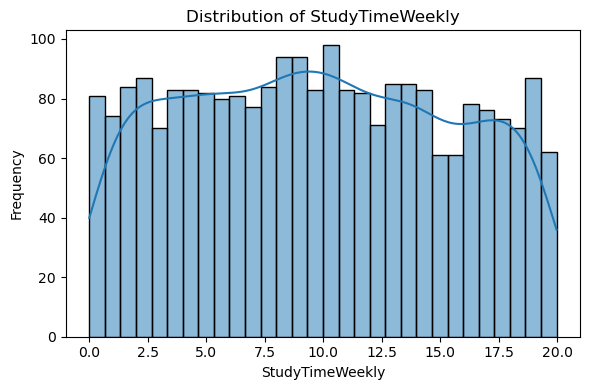

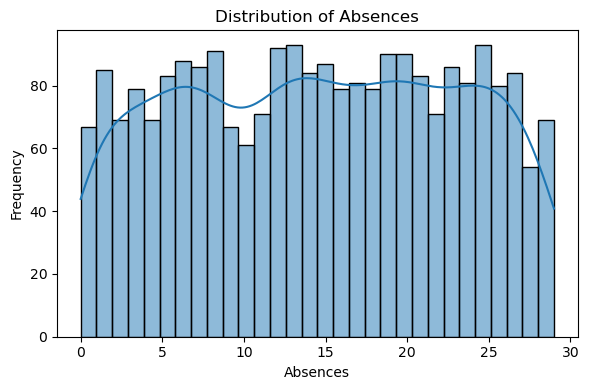

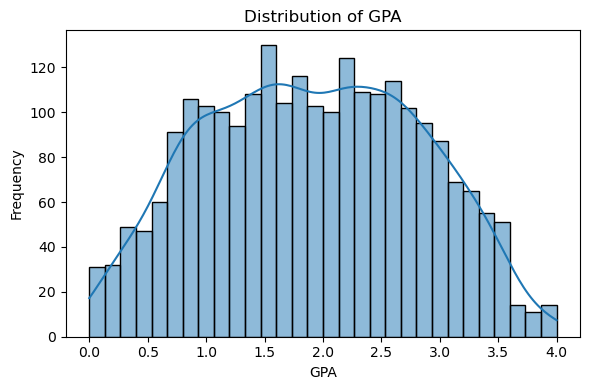

In [15]:
#Histogram plotting for numerical data
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30) #kde adds smooth line for overall shape
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show

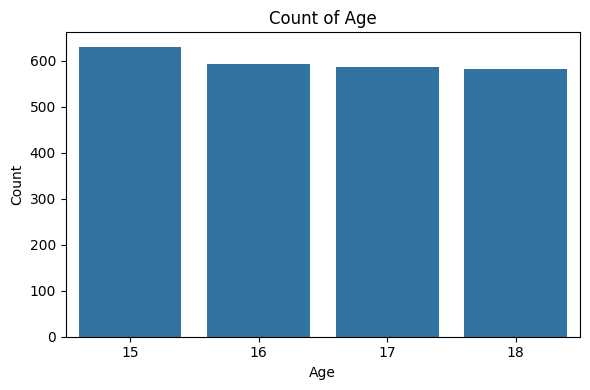

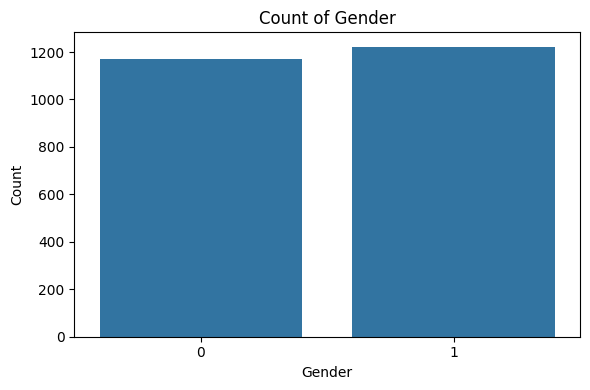

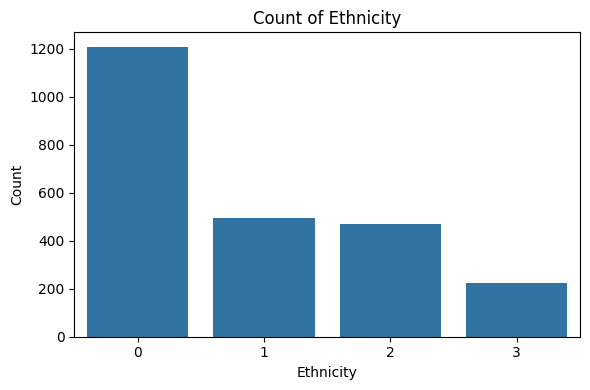

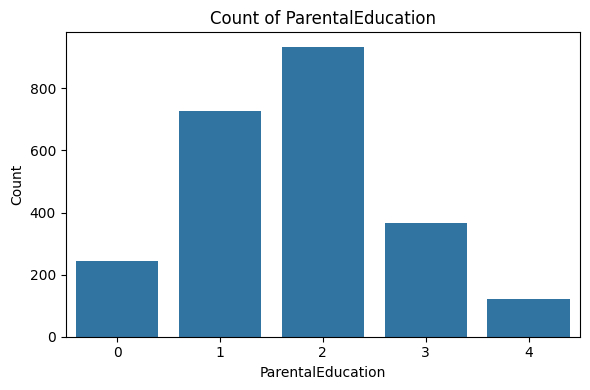

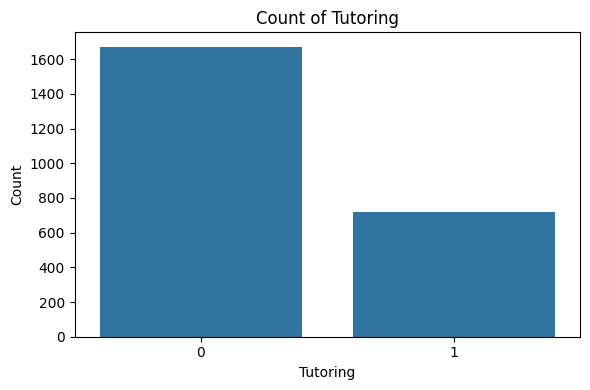

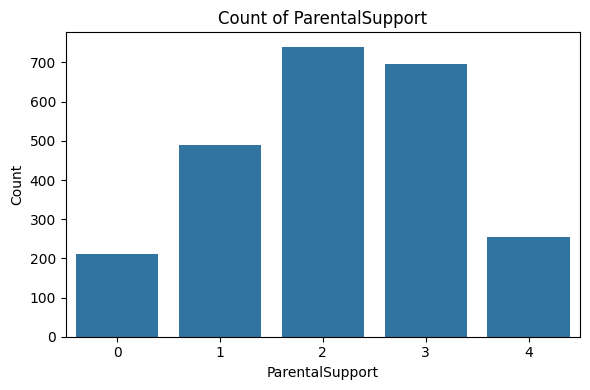

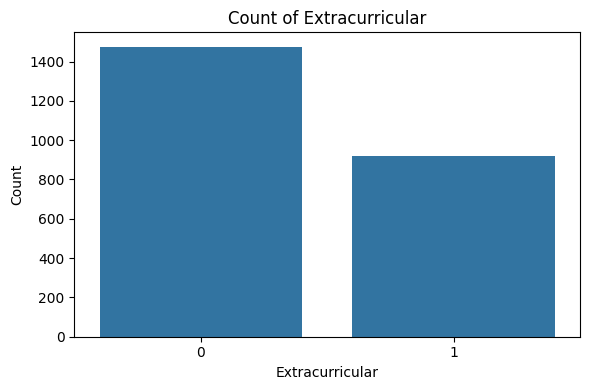

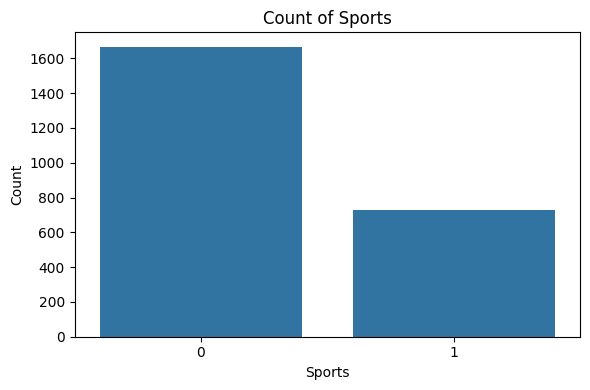

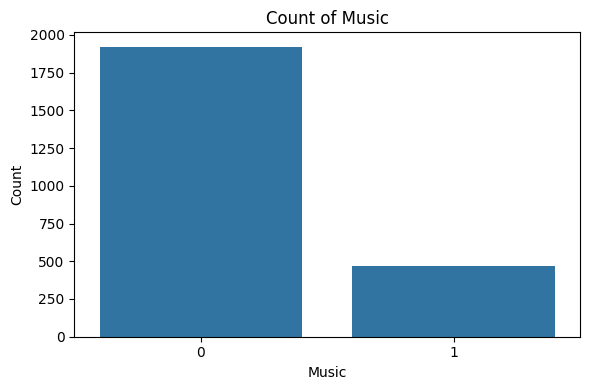

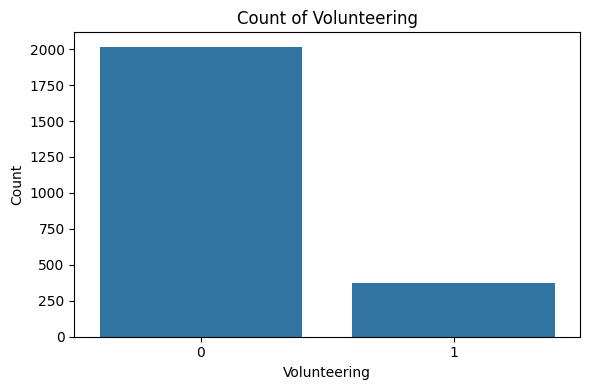

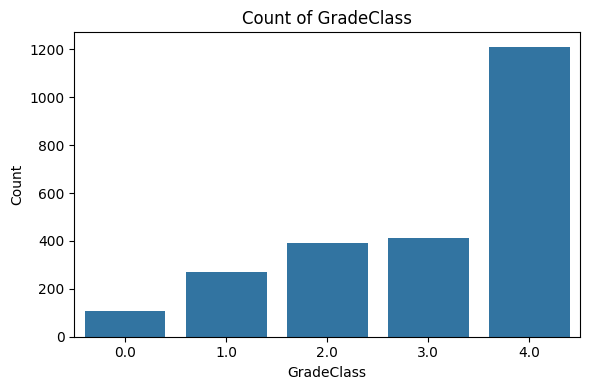

In [14]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df) # x is the category and y is the measure/count
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

##### **5.2 BIVARIATE ANALYSIS**

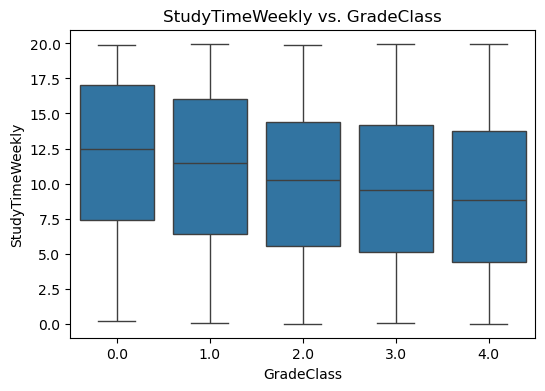

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x='GradeClass', y='StudyTimeWeekly', data=df)
plt.title("StudyTimeWeekly vs. GradeClass")
plt.show()

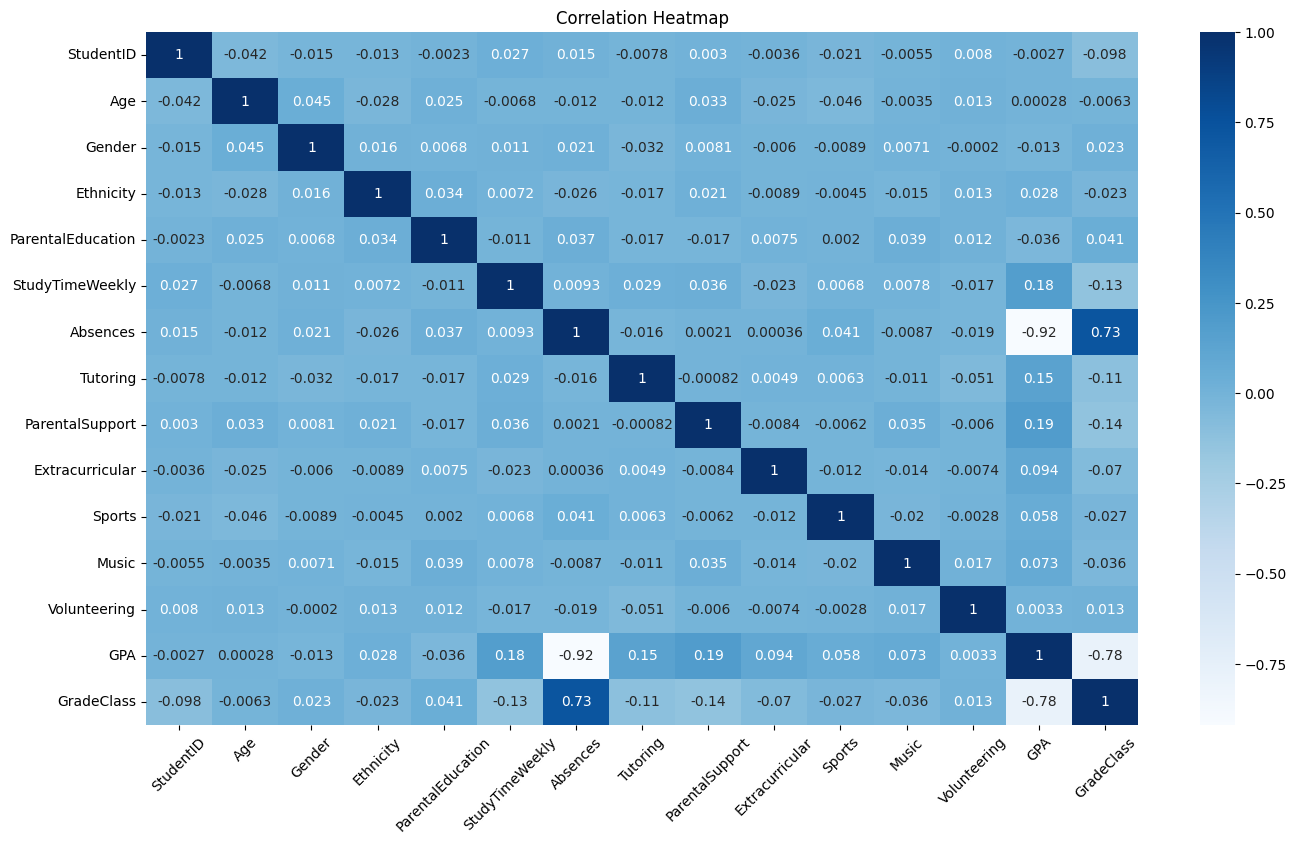

In [16]:
corr = df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

#### **6. MISSING VALUE & OUTLIER TREATMENT**

In [17]:
# Fill numeric columns with median, except for binary columns which will use mode to avoid potentially getting 0.5 as the median: 

binary_columns = ['Gender', 'ParentalSupport', 'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

for col in df.select_dtypes(include='number').columns:
    if col not in binary_columns:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Fill categorical columns with mode

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Remove GPA outliers using IQR

Q1 = df['GPA'].quantile(0.25)
Q3 = df['GPA'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['GPA'] >= Q1 - 1.5 * IQR) & (df['GPA'] <= Q3 + 1.5 * IQR)]

# Check for remaining missing values

print(df.isnull().sum())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


#### **7. EVALUATION METRICS FOR CLASSIFICATION PROBLEM**

A list of the selected evaluation metrics: 

- **Accuracy**
<br>
    Accuracy is the proportion of correct predictions -  so both the true positives and the true negatives - out of the total predictions. It gives an overall sense of how many students' grades are correctly predicted in terms of the classification of GradeClass.
    <br>
    <br>
- **Precision**
<br>
    Precision measures the proportion of true positives - the correct predictions of a specific grade class. It basically determines how often the model is correct based on the number of correct predictions in proportion to the total number of predicitons. In our case it would ensure that predictions of the higher grade class are very accurate.
<br>
<br>
- **Recall**
<br>
    Recall measures the proportion of true positives out of all actual instances of a particular class. So it measures how well the machine learning model identified all the students in a specific class. It makes sure that no one misses out on getting help by identifying the students who are falling behind.
<br>
<br>
- **F1-Score**
<br>
    The F1-score is the harmonic mean of precision and recall, providing a single metric that balances the trade-off between them. This is useful when false positives and false negatives are equally important.
<br>


#### **8. FEATURE ENGINEERING**

In [18]:
df.drop('GPA', axis=1, inplace=True)

Since GradeClass is obtained from GPA, we removed it from the feature set to avoid direct leakage of GradeClass.

In [19]:
df['TotalExtracurricular'] = (df['Sports'] + df['Music'] + df['Volunteering'])

If a student is doing multiple extracurricular activities then their grades could be affected by it in terms of the amount of study time that they have left.

In [20]:
df['ParentalEduSupport'] = df['ParentalEducation'] * df['ParentalSupport']

Interaction Between Parental Education & Parental Support could significantly influence a students performance. By adding the ParentalEducation and ParentalSupport fields we can see what additional academical support each student potentially has.

In [21]:
df = pd.get_dummies(df, columns=['Ethnicity'], prefix='Ethnicity')

Applying One-Hot Encoding to the Ethnicity field to replace categorical data with numeric data

In [22]:
df.drop('StudentID', axis=1, inplace=True)
df.drop('Extracurricular', axis=1, inplace=True)


Removing non-predictive fields form the data frame, these are unnecessary within training the model.  

#### **9. MODEL BUILDING: PART 1**

In [23]:
# Assuming 'df' is the dataframe with your data
X = df.drop('GradeClass', axis=1)  # Feature columns
y = df['GradeClass']  # Target column

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns),  # Numerical columns
        ('cat', OneHotEncoder(), X.select_dtypes(include=['object']).columns)  # Categorical columns
    ]
)

##### **9.1 LOGISTIC REGRESSION**

In [24]:
#Step 2: Model Building
#1 Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Build a pipeline for Logistic Regression
log_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the model
log_reg_pipeline.fit(X_train, y_train)

# Predictions and evaluation
y_pred_log_reg = log_reg_pipeline.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.6555323590814196
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.35      0.35      0.35        49
         2.0       0.49      0.58      0.53        85
         3.0       0.47      0.24      0.32        86
         4.0       0.82      0.96      0.88       237

    accuracy                           0.66       479
   macro avg       0.43      0.43      0.42       479
weighted avg       0.61      0.66      0.62       479



##### **9.2 RANDOM FOREST**

In [25]:
#.Random Forest
from sklearn.ensemble import RandomForestClassifier

# Build a pipeline for Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_pipeline.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6701461377870563
              precision    recall  f1-score   support

         0.0       0.50      0.14      0.21        22
         1.0       0.48      0.49      0.48        49
         2.0       0.48      0.51      0.49        85
         3.0       0.45      0.35      0.39        86
         4.0       0.83      0.93      0.88       237

    accuracy                           0.67       479
   macro avg       0.55      0.48      0.49       479
weighted avg       0.65      0.67      0.65       479



##### **9.3 XGBOOST**

In [52]:
#3. XGBoost
import xgboost as xgb

# Build a pipeline for XGBoost
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])

# Train the model
xgb_pipeline.fit(X_train, y_train)

# Predictions and evaluation
y_pred_xgb = xgb_pipeline.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

C:\Users\peace\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:55:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.6910229645093946
              precision    recall  f1-score   support

         0.0       0.71      0.23      0.34        22
         1.0       0.49      0.55      0.52        49
         2.0       0.54      0.54      0.54        85
         3.0       0.49      0.42      0.45        86
         4.0       0.84      0.92      0.88       237

    accuracy                           0.69       479
   macro avg       0.62      0.53      0.55       479
weighted avg       0.68      0.69      0.68       479



#### **9.4 EVALUATION COMPARISON**

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"🔹 {name}")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score : {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("-" * 40)

# Evaluate Logistic Regression
evaluate_model("Logistic Regression", y_test, y_pred_log_reg)

# Evaluate Random Forest
evaluate_model("Random Forest", y_test, y_pred_rf)

# Evaluate XGBoost
evaluate_model("XGBoost", y_test, y_pred_xgb)

🔹 Logistic Regression
Accuracy : 0.6555
Precision: 0.6119
Recall   : 0.6555
F1 Score : 0.6241
----------------------------------------
🔹 Random Forest
Accuracy : 0.6701
Precision: 0.6483
Recall   : 0.6701
F1 Score : 0.6518
----------------------------------------
🔹 XGBoost
Accuracy : 0.6910
Precision: 0.6821
Recall   : 0.6910
F1 Score : 0.6792
----------------------------------------


**It is evident that *_XGBOOST_* performs the best of the 3 models**

#### **10. MODEL BUILDING: PART 2**

In [31]:
#Defining features and Labels 
X = df.drop("GradeClass", axis=1) #x is the data that the model learns from
y = df["GradeClass"] # y is the target that we direct the model to predict 

In [32]:
#Train and Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Data is split into two parts: one for training(80%) and the other one for testing(20%)

In [33]:
#Scaling Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#The inputs(features) are standardized so the neural network work best

In [34]:
#Pytorch libraries are imported for the build of the Deep Learning Model
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
#Libraries are used for defining, training, and loading data into the model

In [35]:
#Conversion of Data to Pytorch format- Tensor
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [36]:
#Wrapping Tensors in Datasets and Loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)
#The Dataloader is used to help with mini-batching, which ensures efficiency and stability.

In [45]:
#Defining the Neural Network Model
class StudentNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(StudentNet, self).__init__()
        self.fc1 = nn.Linear(input_size,64) #Input layer which matches the feature count
        self.fc2 = nn.Linear(64,32)#Two hidden layers with 64 and 32 neurons
        self.fc3 = nn.Linear(32, num_classes)#Output Layer that matches the number of possible GradeClass values

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#This is the general neural network architecture

In [46]:
#Initializing the Model, Loss, and Optimizer
input_size = X_train.shape[1]
num_classes = len(np.unique(y))
model = StudentNet(input_size, num_classes)

criterion = nn.CrossEntropyLoss() #CrossEntropyLoss is used for multi-classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)#Adam is an optimizer which adapts the learning rate during training,

In [47]:
#Training the Model
epochs = 20 # The training is run in loops(epochs)
for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader: #Predictions, loss calculations, and weight updates are computed
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}") #Prints each epoch for monitoring progress

Epoch 1/20, Loss: 0.9463
Epoch 2/20, Loss: 0.7119
Epoch 3/20, Loss: 0.9875
Epoch 4/20, Loss: 0.9533
Epoch 5/20, Loss: 1.1067
Epoch 6/20, Loss: 0.5524
Epoch 7/20, Loss: 0.9890
Epoch 8/20, Loss: 0.7361
Epoch 9/20, Loss: 0.7290
Epoch 10/20, Loss: 0.7643
Epoch 11/20, Loss: 0.5476
Epoch 12/20, Loss: 0.6028
Epoch 13/20, Loss: 1.0098
Epoch 14/20, Loss: 0.9058
Epoch 15/20, Loss: 0.7165
Epoch 16/20, Loss: 0.5761
Epoch 17/20, Loss: 0.3640
Epoch 18/20, Loss: 0.4280
Epoch 19/20, Loss: 0.4035
Epoch 20/20, Loss: 0.5055


In [48]:
#Evaluating the Model
model.eval() #Turning off dropout and training-only features
with torch.no_grad(): # disabling gradient calculations to save memory and speed up processes
    predictions = model(X_test_tensor)
    predicted_classes = torch.argmax(predictions, dim=1) #argmax selects the most likely class from the model's output probabilities

In [49]:
#Computing Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test_tensor, predicted_classes))

              precision    recall  f1-score   support

           0       0.60      0.14      0.22        22
           1       0.56      0.59      0.57        49
           2       0.60      0.62      0.61        85
           3       0.50      0.43      0.46        86
           4       0.85      0.92      0.88       237

    accuracy                           0.71       479
   macro avg       0.62      0.54      0.55       479
weighted avg       0.70      0.71      0.70       479



#### **11. MODEL DEPLOYMENT**